In [4]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Importing,Preparation and Understanding

In [135]:
# Reading the bikes rental  dataset into 'Bikes' dataframe
Bikes=pd.read_csv(r"C:\Users\HPPC\Desktop\MACHINE LEARNING\day.csv")

In [136]:
Bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [125]:
#Checking the shape of the dataframe 'Bikes'
Bikes.shape

(730, 16)

In [9]:
# Types of each data type column which exist and total memory usage.
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### The above info shows that there are no missing values

In [126]:
Bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [127]:
# Dropping the redundant columns.
Bikes=Bikes.drop(columns=['instant','dteday','casual','registered'])

# These column have been dropped for the following reasons as listed below:
  # --> Instant is just a serial number of the record.
  #--> dteday is redundant becoz the required data related to it is contained in 'yr' and 'mnth' columns
  #--> casual & registered are removed as  both these columns contain the count of bike booked by different categories of customers.Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [128]:
Bikes.shape

(730, 12)

# Encoding and Visualising the data

In [25]:
#Converting season, mnth,weathersit and weekday to categorical columns

## season: Converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter
## mnth: Converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
## weathersit: Converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
## weekday: Converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

In [129]:
#Converting season
Bikes.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
Bikes.season.value_counts(normalize=True)

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [130]:
#Converting Month
Bikes.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
Bikes.mnth.value_counts(normalize=True)

Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [131]:
#Converting Weathersit
Bikes.weathersit.replace((1,2,3,4),('Clear','Misty','Light_rainsnow','Heavy_rainsnow'),inplace=True)
Bikes.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [132]:
# Converting weekday
Bikes.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
Bikes.weekday.value_counts(normalize=True)

Monday       0.143836
Tuesday      0.143836
Wednesday    0.142466
Thursday     0.142466
Friday       0.142466
Saturday     0.142466
Sunday       0.142466
Name: weekday, dtype: float64

In [133]:
Bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Categorical Variable Analysis

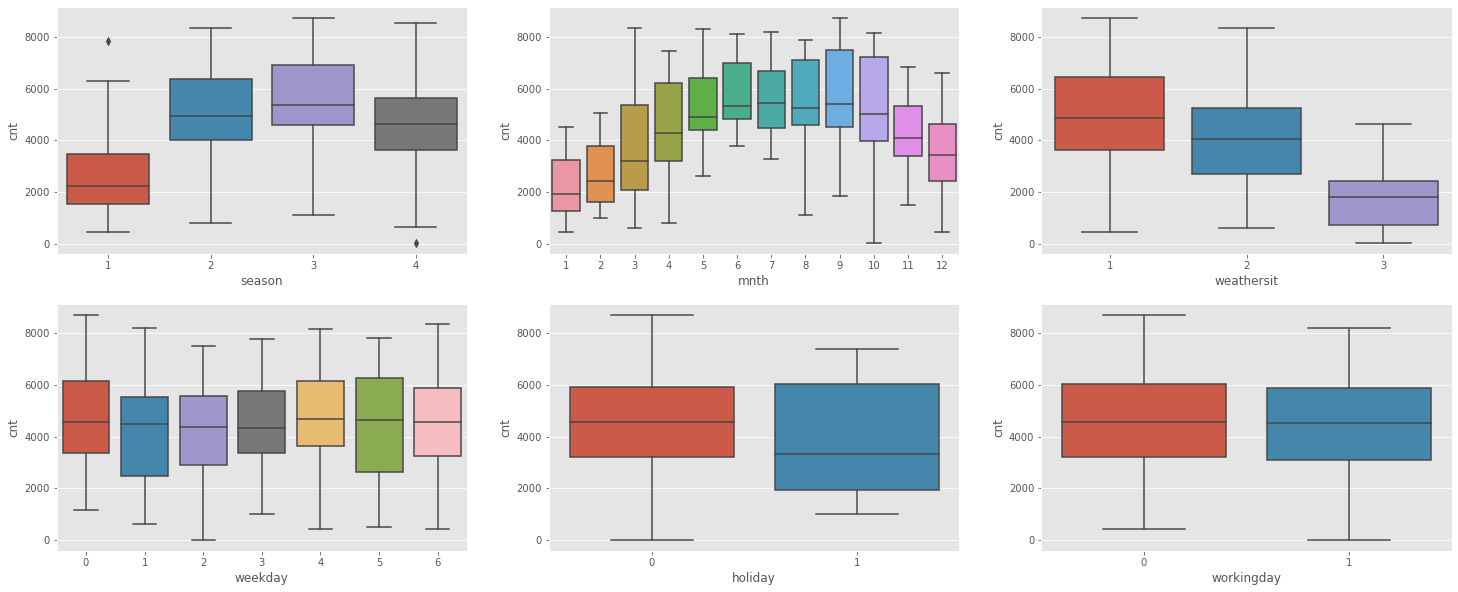

In [171]:
plt.figure(figsize=(25, 10))
plt.style.use("ggplot")
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bikes)
plt.show()

In [116]:
# function to generate plots related to Categorical Variables
def categ_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=Bikes,ci=0.2)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=Bikes, hue='yr',palette='Paired',ci=0.2)
    plt.legend(labels=['2018', '2019'])
    return

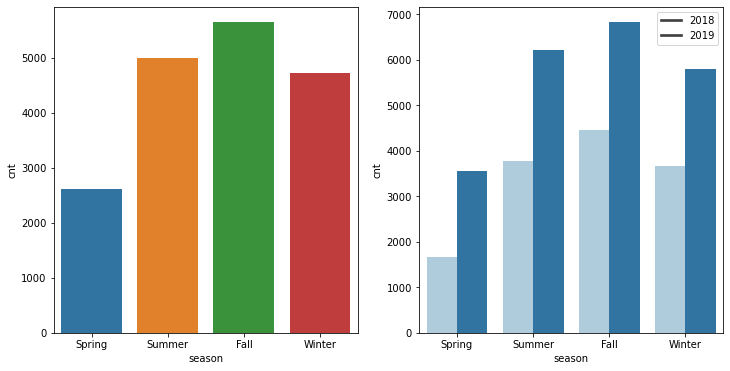

In [117]:
categ_plot('season',12,6)

### The maximum number of bike bookings were done in "Fall".On second and third position comes 'summer' and 'winter' respectively.It indicates that the season can be a good predictor of the dependent variable.

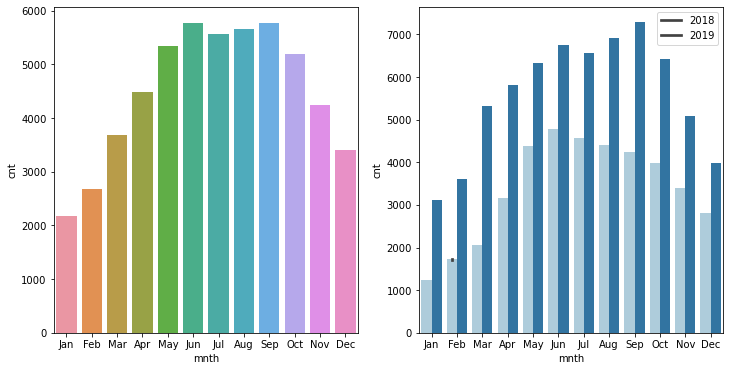

In [118]:
categ_plot('mnth',12,6)

### Maximum number of bookings were done during May-Sep.It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable.

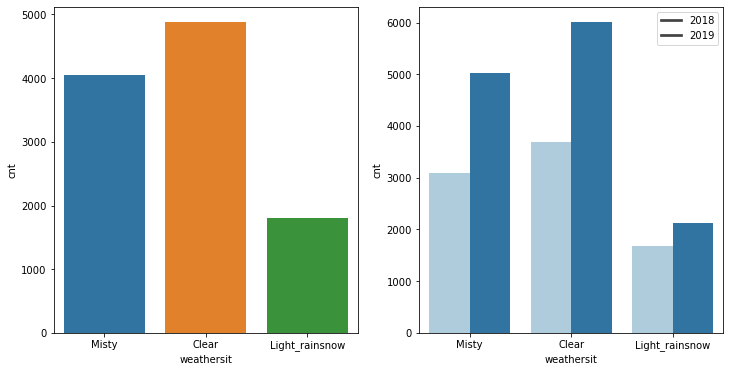

In [119]:
categ_plot('weathersit',12,6)

### The maximum bike bookings were done during clear weather. The second comes misty .It indicates that the weathersit does show some trend towards the bike bookings, and it can be a good predictor for the dependent variable. The current data frame does not have any data where the weather is Heavy_RainSnow

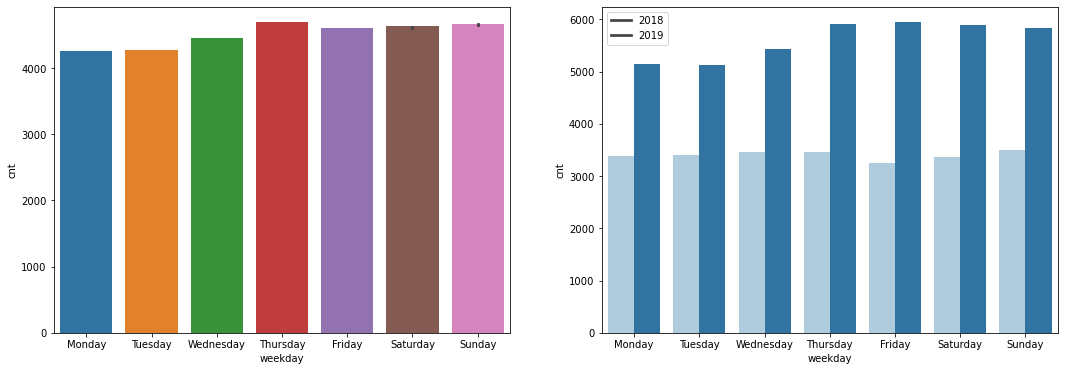

In [120]:
categ_plot('weekday',18,6)

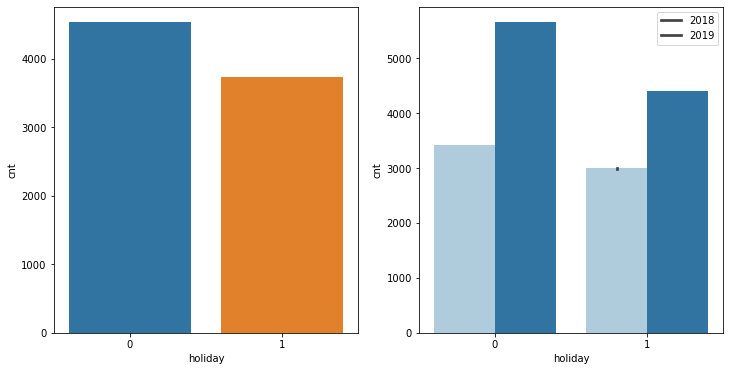

In [121]:
categ_plot('holiday',12,6)

### The maximum number of bike rentals are happening during working days(Non-holiday days)

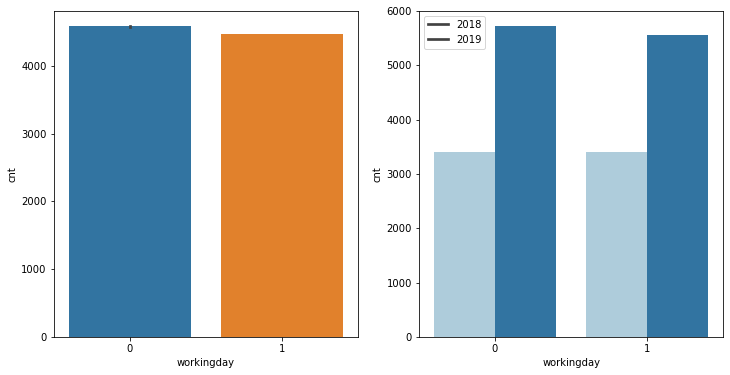

In [122]:
categ_plot('workingday',12,6)

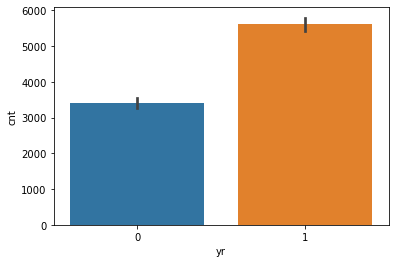

In [32]:
sns.barplot('yr','cnt',data=Bikes)
plt.show()

### Bike rental demand has gone up in 2019 as compared to 2018.

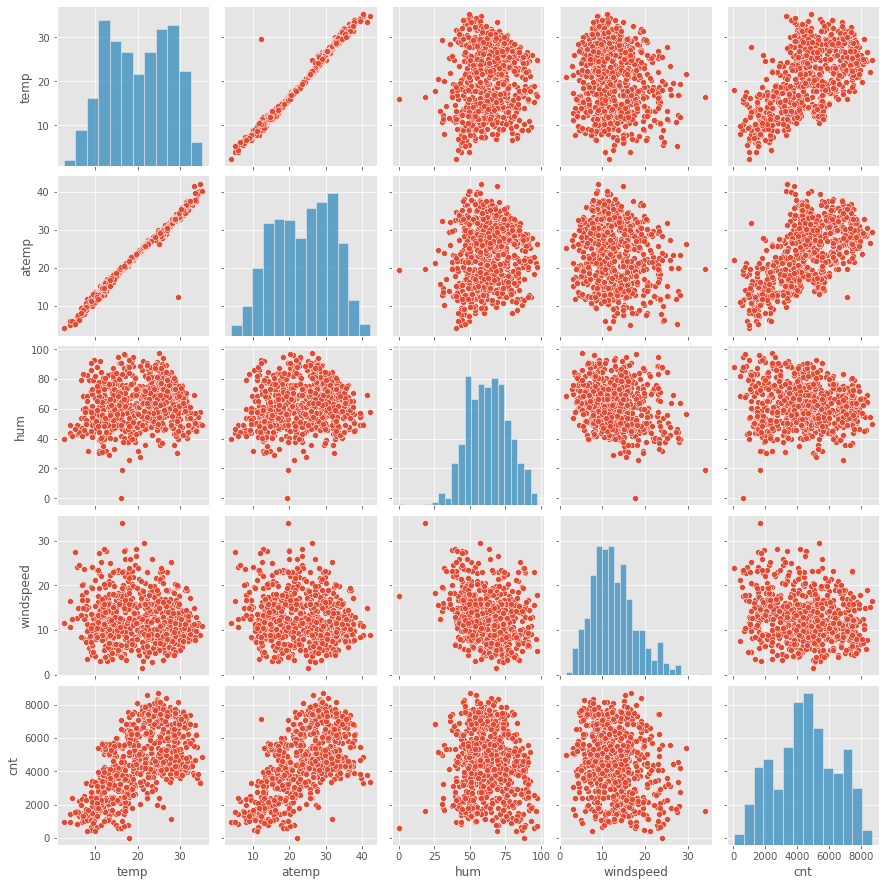

In [172]:
#Generating pairplot to check the relationships between numeric variables variables
plt.style.use("ggplot")
Bikes_num = Bikes[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(Bikes_num)
plt.show()

<AxesSubplot:>

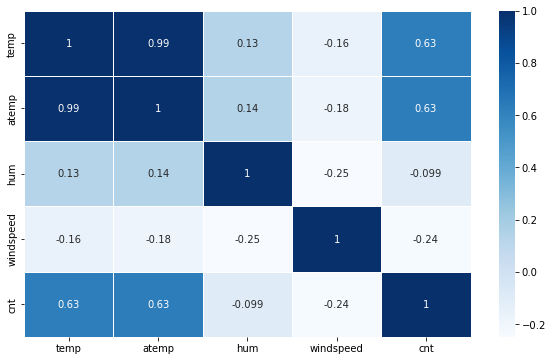

In [36]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (10,6))
sns.heatmap(Bikes_num.corr(), annot = True, cmap="Blues",linewidth =1)

### There is a linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will have to decide which parameters to keep based on VIF and p-value w.r.t other variables

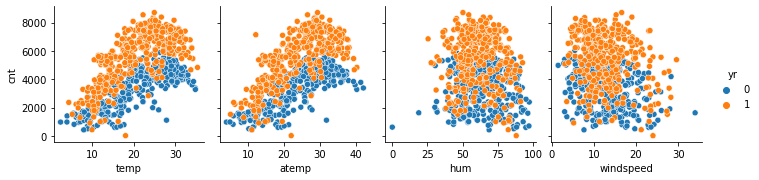

In [49]:
# Checking the impact of year against the numerical variable : 
sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=Bikes, palette='tab10',hue='yr')

plt.show()

###  All the parameters have increased values in 2019 compared to 2018. Thus, year may become a key paratemeter in the model

# Data Preparation

### Dummy Variable creation....

In [50]:
season = pd.get_dummies(Bikes['season'], drop_first = True)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [51]:
weather = pd.get_dummies(Bikes['weathersit'], drop_first = True)
weather.head()

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [52]:
month = pd.get_dummies(Bikes['mnth'], drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [53]:
weekday = pd.get_dummies(Bikes['weekday'], drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [56]:
# Creating a new dataframe called Bikes_new where season, month, weather and weekday dataframe is being added
pd.set_option("display.max_columns",100)
Bikes_new = pd.concat([Bikes,season,month,weather,weekday], axis = 1)
Bikes_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
Bikes_new.shape

(730, 34)

In [58]:
# Deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
Bikes_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
Bikes_new.shape

(730, 30)

In [59]:
Bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Spring          730 non-null    uint8  
 9   Summer          730 non-null    uint8  
 10  Winter          730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

### All the 30 columns are now  numeric in nature. The dataframe is ready now for splitting into Train & Test dataframes

# Splitting the data into Train & Test Dataset

In [61]:
# Machine learning libraries....
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Bikes_train, Bikes_test = train_test_split(Bikes_new, train_size = 0.7, random_state = 100)

In [63]:
Bikes_train.shape

(510, 30)

In [64]:
Bikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,23.500287,63.123710,12.834912,4485.337255,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.029412,0.345098,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,7.431626,8.090963,14.153170,5.292031,1950.666077,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.169124,0.475867,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
Bikes_test.shape

(220, 30)

In [66]:
Bikes_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,20.808400,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,7.672796,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 220 in test dataset

# Rescaling Bikes_train dataframe

In [67]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
Bikes_train[num_vars] = scaler.fit_transform(Bikes_train[num_vars])

In [68]:
Bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


# Checking Correlation Coefficient 

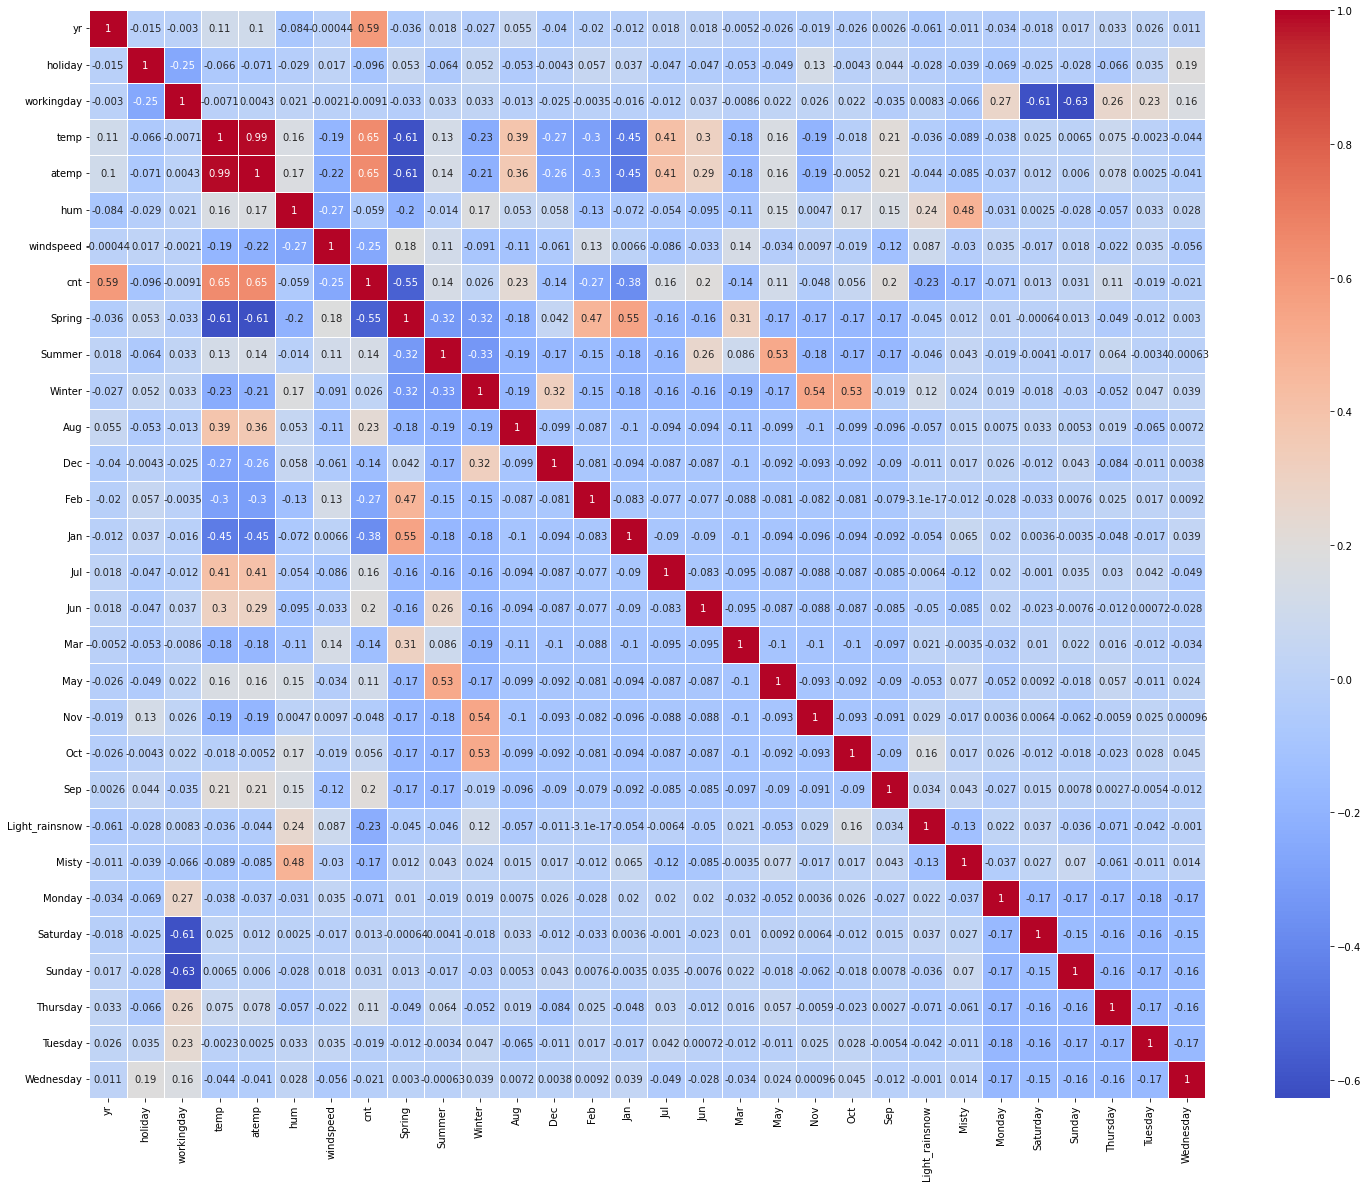

In [73]:
plt.figure(figsize = (25,20))
sns.heatmap(Bikes_train.corr(), annot = True, cmap="coolwarm",linewidth =1)
plt.show()

# There is multi-colinearity between the variables. We need to consider the factors when developing the model.

###  1.temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables
###  2.workingday variable has high negative correlation with Sat & Sun (where workingday =0)
###  3.Spring is negatively correlated with cnt
###  4.temp, atemp and yr has strong correlation with cnt
###  5.misty weather and humidity has correlation
###  6.various months and corresponding weather has correlation

# Building the Linear Model

In [74]:
# Dividing into X_train and y_train
y_train = Bikes_train.pop('cnt')
X_train = Bikes_train

In [79]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)   # Running RFE
rfe = rfe.fit(X_train, y_train)

In [139]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11)]

In [81]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light_rainsnow', 'Misty'],
      dtype='object')

In [82]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [86]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building model using statsmodel, for the detailed statistics

In [85]:
# Function for VIF Calculation

def calcu_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model 1

In [88]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
calcu_VIF(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.82
14,Misty,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


In [89]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          8.15e-189
Time:                        21:06:04   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

### As 'hum' has high VIF ,so removing it and making a new model.

## Model 2

In [94]:
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [95]:
# Run the function to calculate VIF for the new model
calcu_VIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,Winter,2.95
4,Spring,2.89
5,Summer,2.24
0,yr,2.07
10,Nov,1.81
8,Jan,1.66
9,Jul,1.59
13,Misty,1.57


In [96]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          4.75e-186
Time:                        11:36:13   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

### Removing 'Nov' as it has high p-value.

## Model 3

In [97]:
X_train_new = X_train_new.drop(['Nov'], axis = 1)

In [98]:
# Run the function to calculate VIF for the new model
calcu_VIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,Spring,2.89
5,Summer,2.24
0,yr,2.07
6,Winter,2.05
8,Jan,1.65
9,Jul,1.59
12,Misty,1.57
10,Sep,1.34


In [99]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          2.74e-186
Time:                        12:11:28   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

### Removing 'Dec' which is having high p-value

## Model 4

In [100]:
X_train_new = X_train_new.drop(['Dec'], axis = 1)

In [101]:
# Run the function to calculate VIF for the new model
calcu_VIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,Spring,2.75
5,Summer,2.24
0,yr,2.07
6,Winter,1.78
7,Jan,1.61
8,Jul,1.59
11,Misty,1.56
9,Sep,1.34


In [102]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          8.14e-187
Time:                        12:38:00   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

### Removing 'Jan' having high p-value

## Model 5

In [104]:
X_train_new = X_train_new.drop(['Jan'], axis = 1)

In [105]:
# Run the function to calculate VIF for the new model
calcu_VIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,Summer,2.23
4,Spring,2.08
0,yr,2.07
6,Winter,1.78
7,Jul,1.58
10,Misty,1.55
8,Sep,1.34
9,Light_rainsnow,1.08


In [106]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          5.06e-187
Time:                        12:43:46   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

### Removing 'Jul' due to high p-value

## Model 6

In [107]:
X_train_new = X_train_new.drop(['Jul'], axis = 1)

In [109]:
# Run the function to calculate VIF for the new model
calcu_VIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,Spring,1.99
5,Summer,1.90
6,Winter,1.63
9,Misty,1.55
7,Sep,1.23
8,Light_rainsnow,1.08
1,holiday,1.04


In [110]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear  model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          1.47e-186
Time:                        12:48:37   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

### Removing 'Spring' having a comparably high p value.

# Model 7

In [140]:
X_train_new = X_train_new.drop(['Spring'], axis = 1)

In [141]:
# Run the function to calculate VIF for the new model
calcu_VIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,Summer,1.57
8,Misty,1.48
5,Winter,1.37
6,Sep,1.20
7,Light_rainsnow,1.08
1,holiday,1.04


In [143]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Print a summary of the linear  model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          2.83e-186
Time:                        18:07:28   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1259      0.017      7.

In [144]:
lr7.params

const             0.125926
yr                0.232861
holiday          -0.098685
temp              0.548008
windspeed        -0.153246
Summer            0.088080
Winter            0.129345
Sep               0.101195
Light_rainsnow   -0.282869
Misty            -0.078375
dtype: float64

### This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number)

In [145]:
# We will now see the F-statistic value

# F-Statistic

In [146]:
# F-Statistics is used for testing the overall significance of the Model.

# High value for the F-Statistics means the model is more significant and vice-versa.
      # F-Statistic>>>> 271.9
      # Prob (F-statistic): 2.83e-186
# The F-Statistics value of 271.9(greater than 1) and the Prob(F-statistic) of '~0.000'(very low) states that the overall model is significant.
# So we can conclude it as our final model with 10 variables .   

# Model 7 is our final model with R-squared---0.830, Adj. R-squared----0.827
# R-squared = 0.830 which means that 83.0 % of the variance for the target variable ie., 'cnt' is explained by the predictor variables , and hence we say that it is a good model.


### From the coefficients that we get for the variables, our linear regression equation becomes:
cnt=0.125926 + (0.232861 x yr) - (0.098685 x holiday) + (0.548008 x temp) -(0.153246 x windspeed) + (0.088080 x Summer) + (0.129345 x Winter) + (0.101195 x Sep) - (0.282869 x Light_rainsnow) - (0.078375 x Misty) 
              
   
           

# Residual Analysis of the train data

In [153]:
y_train_pred = lr7.predict(X_train_lm7)

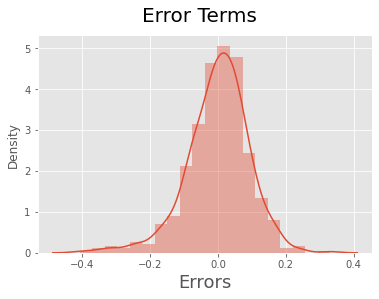

In [154]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
plt.style.use('ggplot')
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                          # X-label
plt.show()

### Since the errors terms are normally distributed with mean=0, thus our assumption is satisfied in our model.

# Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. seventh model.

### Applying the scaling on the test sets

In [155]:
# Scaling Bikes_test dataframe 
# Applying scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset.

In [156]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
Bikes_test[num_vars] = scaler.transform(Bikes_test[num_vars])
Bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [157]:
Bikes_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test 

In [158]:
y_test = Bikes_test.pop('cnt')
X_test = Bikes_test

In [161]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)

X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   holiday         220 non-null    int64  
 3   temp            220 non-null    float64
 4   windspeed       220 non-null    float64
 5   Summer          220 non-null    uint8  
 6   Winter          220 non-null    uint8  
 7   Sep             220 non-null    uint8  
 8   Light_rainsnow  220 non-null    uint8  
 9   Misty           220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.4 KB


In [160]:
# Making predictions using the final model (lr7)

y_pred = lr7.predict(X_test_lm7)

# Model Evaluation

### Let's now plot the graph for actual versus predicted values.

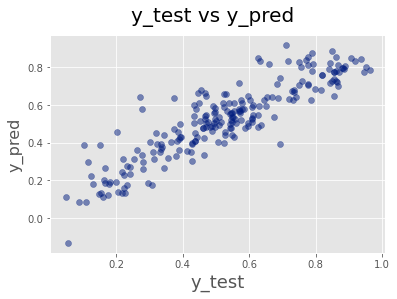

In [175]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.style.use("seaborn-dark-palette")
plt.scatter(y_test, y_pred,alpha=0.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

R2 Value Calculation for Bikes_test dataframe 

In [164]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.7942

Adjusted R2 Value Calculation for Bikes_test dataframe 

In [165]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7854

In [168]:
# calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error
from sklearn import metrics
print('Mean Absolute Error>>', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error>>', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error>>', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error>> 0.075773967120758
Mean Squared Error>> 0.009840286135133235
Root Mean Squared Error>> 0.09919821639088697


### The Root Mean Squared Error value for the test dataset based on final model is 0.099 and Mean Absolute Error is 0.0757, which indicates that the model is really good.


# Measurement-----Train Dataset-----Test Dataset
# R2 Value------------	      83.0	     -------------  79.42
# Adjusted R2 Value--	 82.7	    ---------- ---- 78.54


In [169]:
# As we can see that the difference between the R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model .

# As we can see that the difference between the Adj R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model .

The three most significant variables affecting the demand for shared bikes are :
1. temperature
2. year
3. Winter
4. Sep
5. Summer

As per the final regression equation/ equation of  best fitted line>>>>

cnt=0.125926 + (0.232861 x yr) - (0.098685 x holiday) + (0.548008 x temp) -(0.153246 x windspeed) + (0.088080 x Summer) + (0.129345 x Winter) + (0.101195 x Sep) - (0.282869 x Light_rainsnow) - (0.078375 x Misty)

### It is recommended to give utmost importance to these five variables while planning to achieve maximum bike rental booking.